In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

import seaborn as sns
import matplotlib.pyplot as plt

#plt.style.use(style="seaborn")
sns.set_style(style="whitegrid")
%matplotlib inline


In [2]:
#print(data[4])

In [3]:
import requests
from pandas.io.json import json_normalize
import pandas as pd

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=XBWE6AW71G5WSGCC'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-02-23 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-02-23 19:55:00': {'1. open': '185.6000', '2. high': '185.6000', '3. low': '185.6000', '4. close': '185.6000', '5. volume': '90'}, '2024-02-23 19:45:00': {'1. open': '185.6000', '2. high': '185.6000', '3. low': '185.4600', '4. close': '185.4600', '5. volume': '2'}, '2024-02-23 19:30:00': {'1. open': '185.6800', '2. high': '185.6900', '3. low': '185.6800', '4. close': '185.6900', '5. volume': '214'}, '2024-02-23 19:20:00': {'1. open': '185.6900', '2. high': '185.6900', '3. low': '185.3200', '4. close': '185.4600', '5. volume': '3'}, '2024-02-23 19:10:00': {'1. open': '185.6900', '2. high': '185.6900', '3. low': '185.6900', '4. close': '185.6900', '5. volume': '10'}, '2024-02-23 19:00:00': {'1. open': '185.7200', '2. high': 

In [4]:
import requests
import pandas as pd

# Realizar solicitud HTTP a la API
response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=XBWE6AW71G5WSGCC')

# Convertir la respuesta JSON en un DataFrame de pandas
data = pd.DataFrame(response.json()['Time Series (5min)']).transpose()

# Convertir las columnas a números
data = data.apply(pd.to_numeric)

# Mostrar los datos sin los encabezados
#print(data.to_string(header=False))
#data.describe()

data.columns = ["Open","High","Low","Close","Volume"]

print(data)


                        Open     High     Low    Close  Volume
2024-02-23 19:55:00  185.600  185.600  185.60  185.600      90
2024-02-23 19:45:00  185.600  185.600  185.46  185.460       2
2024-02-23 19:30:00  185.680  185.690  185.68  185.690     214
2024-02-23 19:20:00  185.690  185.690  185.32  185.460       3
2024-02-23 19:10:00  185.690  185.690  185.69  185.690      10
...                      ...      ...     ...      ...     ...
2024-02-23 10:55:00  185.715  185.920  185.55  185.880   30774
2024-02-23 10:50:00  185.600  185.819  185.59  185.730   43463
2024-02-23 10:45:00  185.680  185.770  185.38  185.610   41449
2024-02-23 10:40:00  185.960  186.000  185.59  185.685   51837
2024-02-23 10:35:00  186.230  186.245  185.87  185.960  126199

[100 rows x 5 columns]


In [5]:
#https://query1.finance.yahoo.com/v7/finance/chart/TSLA?range=1mo&interval=1d

In [6]:
#https://api.polygon.io/v2/aggs/ticker/TSLA/range/1/day/20220203/20220304?apiKey=YOUR_API_KEY

In [7]:
#https://polygon.io/stocks?auth=signup

In [8]:
#df = pd.read_csv("convertcsvBT5min.csv") #5minutes

In [9]:
#df.describe()

In [10]:
df = data

In [11]:
df.Close

2024-02-23 19:55:00    185.600
2024-02-23 19:45:00    185.460
2024-02-23 19:30:00    185.690
2024-02-23 19:20:00    185.460
2024-02-23 19:10:00    185.690
                        ...   
2024-02-23 10:55:00    185.880
2024-02-23 10:50:00    185.730
2024-02-23 10:45:00    185.610
2024-02-23 10:40:00    185.685
2024-02-23 10:35:00    185.960
Name: Close, Length: 100, dtype: float64

In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,185.840390,185.904310,185.721710,185.797510,4.712068e+04
std,0.227924,0.241434,0.267894,0.262165,1.384235e+05
min,185.310000,185.450000,185.010000,185.260000,2.000000e+00
25%,185.690000,185.700000,185.547500,185.607500,2.070000e+02
50%,185.815000,185.920000,185.700000,185.805000,1.900100e+04
75%,186.025000,186.090250,185.932500,186.006250,2.955700e+04
max,186.310000,186.370000,186.250000,186.305000,1.109251e+06


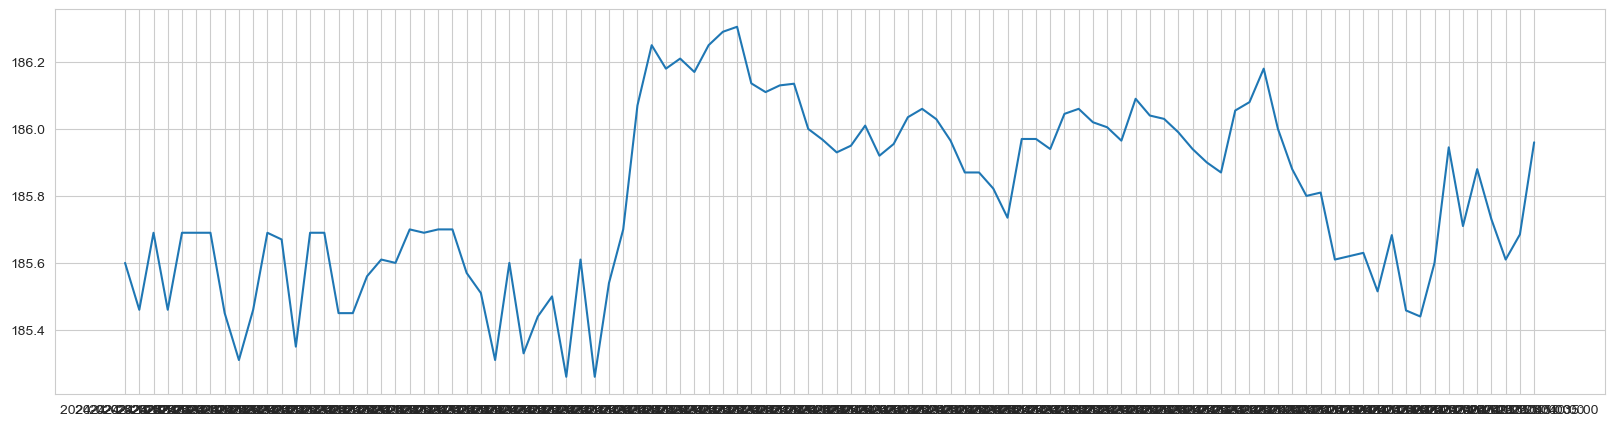

In [13]:
plt.figure(1, figsize=(20,5)) 
_ = plt.plot(df.Close)

Calculate the percetange change

https://en.wikipedia.org/wiki/Stationary_process




In [14]:
df["returns"] = df['Close'].pct_change()

In [15]:
df

,Open,High,Low,Close,Volume,returns
2024-02-23 19:55:00,185.600,185.600,185.60,185.600,90,NaN
2024-02-23 19:45:00,185.600,185.600,185.46,185.460,2,-0.000754
2024-02-23 19:30:00,185.680,185.690,185.68,185.690,214,0.001240
2024-02-23 19:20:00,185.690,185.690,185.32,185.460,3,-0.001239
2024-02-23 19:10:00,185.690,185.690,185.69,185.690,10,0.001240
...,...,...,...,...,...,...
2024-02-23 10:55:00,185.715,185.920,185.55,185.880,30774,0.000915
2024-02-23 10:50:00,185.600,185.819,185.59,185.730,43463,-0.000807
2024-02-23 10:45:00,185.680,185.770,185.38,185.610,41449,-0.000646
2024-02-23 10:40:00,185.960,186.000,185.59,185.685,51837,0.000404


In [16]:
52394.40/52252.27 - 1

0.0027200732140442163

Calculate the log returns

Why use log returns:
https://quantivity.wordpress.com/2011/02/21/why-log-returns


In [17]:
df["log_returns"] = np.log(1+df["returns"])

In [18]:
df.head(5)

,Open,High,Low,Close,Volume,returns,log_returns
2024-02-23 19:55:00,185.60,185.60,185.60,185.60,90,NaN,NaN
2024-02-23 19:45:00,185.60,185.60,185.46,185.46,2,-0.000754,-0.000755
2024-02-23 19:30:00,185.68,185.69,185.68,185.69,214,0.001240,0.001239
2024-02-23 19:20:00,185.69,185.69,185.32,185.46,3,-0.001239,-0.001239
2024-02-23 19:10:00,185.69,185.69,185.69,185.69,10,0.001240,0.001239


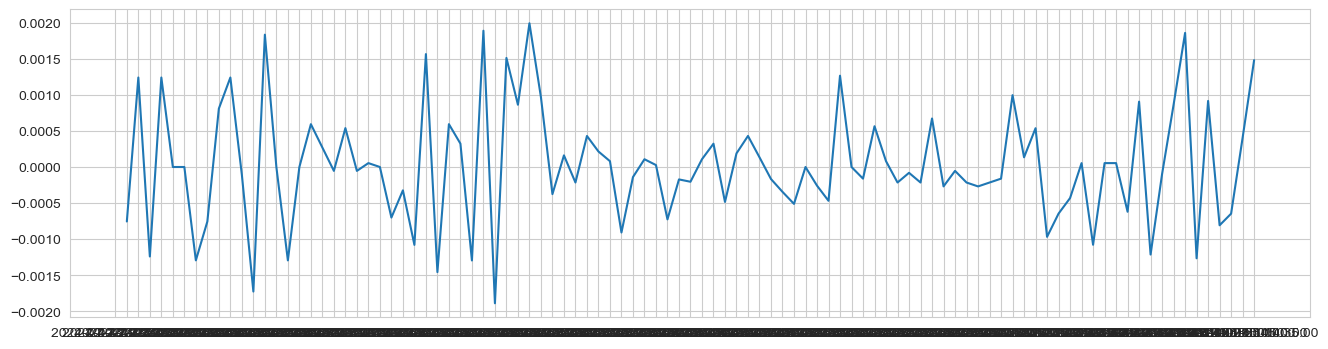

In [19]:
plt.figure(1, figsize=(16,4))
plt.plot(df.log_returns)

In [20]:
#quitamos los num's ceros y na p simplif
df.dropna(inplace=True)
X = df[["Close","log_returns"]].values

In [21]:
#matrix con 2 valores
X

array([[ 1.85460000e+02, -7.54594980e-04],
       [ 1.85690000e+02,  1.23939124e-03],
       [ 1.85460000e+02, -1.23939124e-03],
       [ 1.85690000e+02,  1.23939124e-03],
       [ 1.85690000e+02,  0.00000000e+00],
       [ 1.85690000e+02,  0.00000000e+00],
       [ 1.85450000e+02, -1.29331268e-03],
       [ 1.85310000e+02, -7.55205560e-04],
       [ 1.85460000e+02,  8.09126996e-04],
       [ 1.85690000e+02,  1.23939124e-03],
       [ 1.85670000e+02, -1.07712193e-04],
       [ 1.85350000e+02, -1.72497482e-03],
       [ 1.85690000e+02,  1.83268702e-03],
       [ 1.85690000e+02,  0.00000000e+00],
       [ 1.85450000e+02, -1.29331268e-03],
       [ 1.85450000e+02,  0.00000000e+00],
       [ 1.85560000e+02,  5.92975948e-04],
       [ 1.85610000e+02,  2.69418327e-04],
       [ 1.85600000e+02, -5.38778589e-05],
       [ 1.85700000e+02,  5.38648007e-04],
       [ 1.85690000e+02, -5.38517462e-05],
       [ 1.85700000e+02,  5.38517462e-05],
       [ 1.85700000e+02,  0.00000000e+00],
       [ 1.

In [22]:
#para normalizar proximam
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)

In [24]:
X_scaled = scaler.transform(X)

In [25]:
X_scaled[:5]

array([[0.19138756, 0.2921297 ],
       [0.41148325, 0.80631759],
       [0.19138756, 0.16711561],
       [0.41148325, 0.80631759],
       [0.41148325, 0.4867166 ]])

In [26]:
y = [x[0] for x in X_scaled]

In [27]:
#serie de precios - precio del dia siguiente 
y[:5]

[0.19138755980861788,
 0.4114832535885,
 0.19138755980861788,
 0.4114832535885,
 0.4114832535885]

In [28]:
#dividir nuestros datos en Train y en Test

In [29]:
split = int(len(X_scaled)*0.8)

In [30]:
print(split)  # es el .80 qty para Train

79


In [31]:
X_train = X_scaled[:split]

In [32]:
X_test = X_scaled[split:len(X_scaled)]


In [33]:
len(X_test)  #qty for test

20

In [34]:
y_train = y[:split]

In [35]:
y_test = y[split:len(y)]

In [36]:
#solo para asegurarnos q son iguales, si son difs es un error
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [37]:
X_train

array([[0.19138756, 0.2921297 ],
       [0.41148325, 0.80631759],
       [0.19138756, 0.16711561],
       [0.41148325, 0.80631759],
       [0.41148325, 0.4867166 ],
       [0.41148325, 0.4867166 ],
       [0.18181818, 0.15321093],
       [0.04784689, 0.29197225],
       [0.19138756, 0.69536564],
       [0.41148325, 0.80631759],
       [0.3923445 , 0.45894093],
       [0.0861244 , 0.0418985 ],
       [0.41148325, 0.95931038],
       [0.41148325, 0.4867166 ],
       [0.18181818, 0.15321093],
       [0.18181818, 0.4867166 ],
       [0.28708134, 0.63962691],
       [0.33492823, 0.55619133],
       [0.32535885, 0.47282315],
       [0.42105263, 0.6256174 ],
       [0.41148325, 0.47282989],
       [0.42105263, 0.50060332],
       [0.42105263, 0.4867166 ],
       [0.29665072, 0.30613097],
       [0.23923445, 0.40332671],
       [0.04784689, 0.20855538],
       [0.32535885, 0.88995254],
       [0.06698565, 0.11131029],
       [0.1722488 , 0.63972589],
       [0.22966507, 0.57013796],
       [0.

In [38]:
y_train

[0.19138755980861788,
 0.4114832535885,
 0.19138755980861788,
 0.4114832535885,
 0.4114832535885,
 0.4114832535885,
 0.18181818181815856,
 0.04784688995215447,
 0.19138755980861788,
 0.4114832535885,
 0.39234449760763823,
 0.08612440191387805,
 0.4114832535885,
 0.4114832535885,
 0.18181818181815856,
 0.18181818181815856,
 0.2870813397129268,
 0.3349282296650813,
 0.325358851674622,
 0.4210526315789309,
 0.4114832535885,
 0.4210526315789309,
 0.4210526315789309,
 0.2966507177033293,
 0.23923444976074393,
 0.04784688995215447,
 0.325358851674622,
 0.06698564593301626,
 0.1722488038277561,
 0.22966507177034146,
 0.0,
 0.3349282296650813,
 0.0,
 0.2679425837320366,
 0.4210526315789309,
 0.7751196172248456,
 0.9473684210526017,
 0.8803827751196138,
 0.9090909090909065,
 0.8708133971291545,
 0.9473684210526017,
 0.9856459330143252,
 1.0,
 0.8382775119617065,
 0.8133971291865976,
 0.8325358851674309,
 0.8373205741626464,
 0.7081339712918577,
 0.6775119617224732,
 0.6411483253588415,
 0.66028

Labeling using LSTM

memoria corto plazo,  el RNN (no memoriza)
output  t+1

In [39]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  #predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i-n:i, : X_test.shape[1]])
    ytest.append(y_test[i])  #predict next record

In [40]:
df.head(5)

,Open,High,Low,Close,Volume,returns,log_returns
2024-02-23 19:45:00,185.60,185.60,185.46,185.46,2,-0.000754,-0.000755
2024-02-23 19:30:00,185.68,185.69,185.68,185.69,214,0.001240,0.001239
2024-02-23 19:20:00,185.69,185.69,185.32,185.46,3,-0.001239,-0.001239
2024-02-23 19:10:00,185.69,185.69,185.69,185.69,10,0.001240,0.001239
2024-02-23 19:00:00,185.72,185.72,185.69,185.69,495739,0.000000,0.000000


In [41]:
Xtrain[0]

array([[0.19138756, 0.2921297 ],
       [0.41148325, 0.80631759],
       [0.19138756, 0.16711561]])

In [42]:
ytrain[0]

0.4114832535885

In [43]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [44]:
scaler.inverse_transform(val)

array([[ 1.85690000e+02, -1.88745439e-03]])

In a LSTM network the input for each LSTM layer needs next informaiton:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:
(number of observatios, number of steps, number of features per step)



In [45]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))

In [46]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))


In [47]:
Xtest, ytest = (np.array(Xtest), np.array(ytest))

In [48]:
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [49]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(76, 3, 2)
(76,)
---
(17, 3, 2)
(17,)


### install tensorflow and keras


https://margaretmz.medium.com/anaconda-jupyter-notebook-tensorflow-and-keras-b91f381405f8

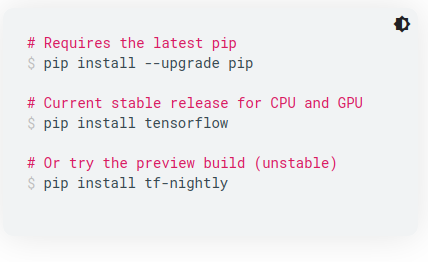




In [50]:
#pip install tensorflow (es para cuando tienes GPU (acelerador grafico en la lap))
#pip install tf-nightly (para cuando no tienes acelerador grafico)
#pip install keras

In [51]:
#verificamos si está instalado el tensorflow
#print ("TensorFlow version: " + tf.__version__)

### LSTM Model

In [52]:
conda install keras

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Constantino\anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.12.12 |       haa95532_0         127 KB
    certifi-2024.2.2           |  py310haa95532_0         160 KB
    ------------------------------------------------------------
                                           Total:         287 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2024.2.2~ --> pkgs/main::ca-certificates-2023.12.12-haa95532_0 
  certifi            conda-forge/noarch::certifi-2024.2.2-~ --> pkgs/main/win-64::certifi-2024.2.2-py310haa95532_0 




ca-certificates-2023 | 127 KB    |            |   0% 

certifi-2024.2.2     | 160 KB    |    



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2




In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

In [ ]:
model.summary()

In [ ]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [ ]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [ ]:
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [ ]:
print(trainPredict[:20])
print(testPredict[:20])

In [ ]:
print(trainPredict)


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#calculate root mean squared error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

In [ ]:
testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

In [ ]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(trainPredict[:20])

In [ ]:
# Apilar los __DataFrames__ uno encima del otro
type(df.Close)

In [ ]:
type(trainPredict[:20])

In [ ]:
df_close_list = df.Close.tolist()

In [ ]:
tendencia = df_close_list + trainPredict[:20]

In [ ]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(df_close_list)

In [ ]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(tendencia)